<a href="https://colab.research.google.com/github/justwannachill/NM/blob/main/%D0%A8%D0%B8%D0%BB%D0%BE%D0%B2_%D0%94_%D0%92_7_%D0%9B%D0%B0%D0%B1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Перша інтерполяційна формула Ньютона
Шилов Д.В. 14 варіант

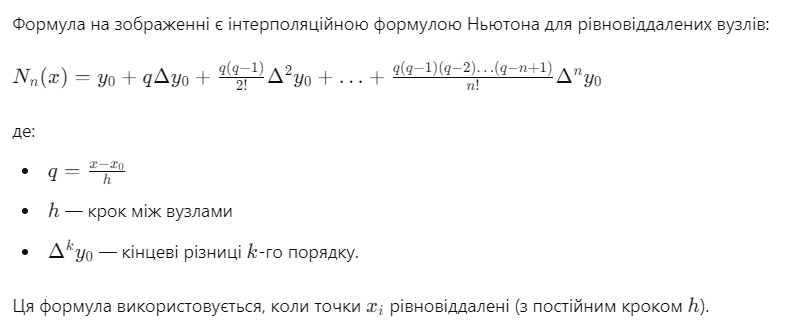

In [5]:
import numpy as np
from math import factorial

# задані точки
x = np.array([0.18 + i * 0.005 for i in range(0, 11)])  # задаємо x генератором списків
y = np.array([5.5154, 5.4669, 5.3263, 5.1930, 5.0664, 4.9461, 4.8317, 4.7226, 4.6185, 4.5191, 4.4242])

print("x = ", x)
print("y = ", y)

# Перша інтерполяційна формула Ньютона (інтерполяція вперед)
def newton_forward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]  # Крок між вузлами (він має бути однаковим)

    # Обчислення кінцевих різниць
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n-j):
            delta_y[i, j] = delta_y[i+1, j-1] - delta_y[i, j-1]

    # Обчислення значення q
    q = (x0 - x[0]) / h

    # Використання формули Ньютона для інтерполяції вперед
    ans = delta_y[0, 0]
    q_prod = 1

    for i in range(1, n):
        q_prod *= (q - i + 1)  # Обчислення добутку q*(q-1)*(q-2)*...*(q-i+1)
        ans += (q_prod * delta_y[0, i]) / factorial(i)

    return ans

# Обчислюємо значення функції в точці x = 0.19
x1 = 0.19 #Замінити точку вашого варіанту (точка на початку відрізку)
y1 = newton_forward_interpolation(x, y, x1)

print(f"f({x1}) = {y1}")

x =  [0.18  0.185 0.19  0.195 0.2   0.205 0.21  0.215 0.22  0.225 0.23 ]
y =  [5.5154 5.4669 5.3263 5.193  5.0664 4.9461 4.8317 4.7226 4.6185 4.5191
 4.4242]
f(0.19) = 5.3263


Друга інтерполяційна формула Ньютона (інтерполяція назад)

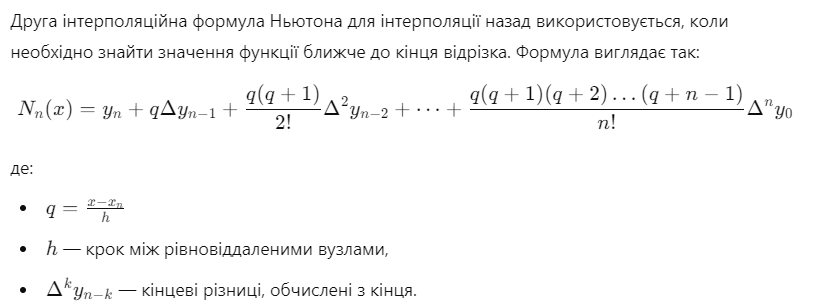

In [4]:
#import numpy as np
#from math import factorial

# задані точки
# x = np.array([0.18 + i * 0.005 for i in range(0, 11)])  # задаємо x генератором списків
# y = np.array([5.5154, 5.4669, 5.3263, 5.1930, 5.0664, 4.9461, 4.8317, 4.7226, 4.6185, 4.5191, 4.4242])

# Друга інтерполяційна формула Ньютона (інтерполяція назад)
def newton_backward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]  # Крок між вузлами (він має бути однаковим)

    # Обчислення кінцевих різниць
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n-j):
            delta_y[i, j] = delta_y[i+1, j-1] - delta_y[i, j-1]

    # Обчислення значення q
    q = (x0 - x[-1]) / h

    # Використання формули Ньютона для інтерполяції назад
    ans = delta_y[-1, 0]  # Починаємо з y_n
    q_prod = 1

    for i in range(1, n):
        q_prod *= (q + i - 1)  # Обчислення добутку q*(q+1)*(q+2)*...*(q+i-1)
        ans += (q_prod * delta_y[n-i-1, i]) / factorial(i)

    return ans

# Обчислюємо значення функції в точці x = 0.227
x2 = 0.227 #точка в кінці відрізка
y2 = newton_backward_interpolation(x, y, x2)

print(f"f({x2}) = {y2}")


f(0.227) = 4.481175088307406


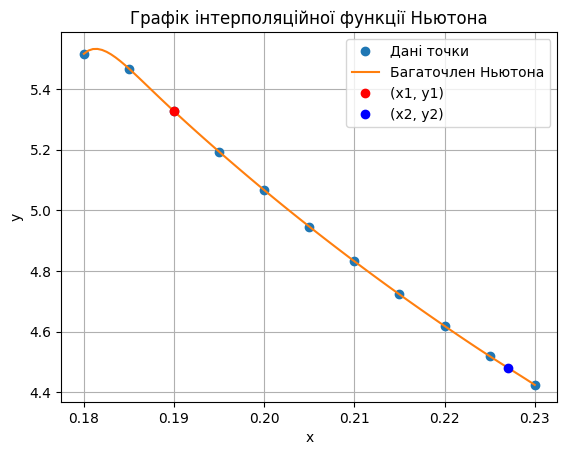

In [6]:
#import numpy as np
import matplotlib.pyplot as plt

# будуємо графік інтерполяційної функції
xx = np.linspace(np.min(x), np.max(x), 100)
yy = np.zeros_like(xx)
for i in range(len(xx)):
    # Використовуйте відповідну функцію інтерполяції
    if xx[i] <= x[len(x) // 2]:  # Використовуємо інтерполяцію вперед для першої половини
        yy[i] = newton_forward_interpolation(x, y, xx[i])
    else:  # Використовуємо інтерполяцію назад для другої половини
        yy[i] = newton_backward_interpolation(x, y, xx[i])

plt.plot(x, y, 'o', label='Дані точки')
plt.plot(xx, yy, label="Багаточлен Ньютона")
plt.plot(x1, y1, 'ro', label='(x1, y1)')
plt.plot(x2, y2, 'bo', label='(x2, y2)')
plt.title("Графік інтерполяційної функції Ньютона")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()